<img src="https://i.imgur.com/FoKB5Z5.png" align="left" width="300" height="250" title="source: imgur.com" /></a>

## Program Code: J620-002-4:2020 

## Program Name: FRONT-END SOFTWARE DEVELOPMENT
## Title :  P09 Sample Data Analysis and Exploration

#### Name: Ooi Caaron

#### IC Number: 990701-07-5837

#### Date : 28/6/23

#### Introduction : Show the graph base on the given data and expected output



#### Conclusion : Still need to practice more






# Module P9 - Sample Data Analysis and Exploration

In this module, you will try your hand at performing some data analysis on some data. Before that, you should also try to prepare the data as well as you can by doing some data cleaning and preparation. And finally, your analysis can be better captured in the form of some data visualizations.

First, let's import all the necessary packages.

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# This line configures matplotlib to show figures embedded in the Jupyter notebook, 
# instead of opening a new window for each figure.
%matplotlib inline

The data that we are going to use contains some sample sales data, and it is taken from [Kaggle](https://www.kaggle.com/kyanyoga/sample-sales-data). It's not a very big dataset, having only ~2,800 rows of data.

In [32]:
df = pd.read_csv("sales_data_sample.csv", encoding='windows-1252')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df

ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER     SALES  \
0           10107               30      95.70                2   2871.00   
1           10121               34      81.35                5   2765.90   
2           10134               41      94.74                2   3884.34   
3           10145               45      83.26                6   3746.70   
4           10159               49     100.00               14   5205.27   
5           10168               36      96.66                1   3479.76   
6           10180               29      86.13                9   2497.77   
7           10188               48     100.00                1   5512.32   
8           10201               22      98.57                2   2168.54   
9           10211               41     100.00               14   4708.44   
10          10223               37     100.00                1   3965.66   
11          10237               23     100.00                7   2333.12   
12          10251               28     100.00                2   3188.64   
13          10263               34     100.00                2   3676.76   
14          10275               45      92.83                1   4177.35   
15          10285               36     100.00                6   4099.68   
16          10299               23     100.00                9   2597.39   
17          10309               41     100.00                5   4394.38   
18          10318               46      94.74                1   4358.04   
19          10329               42     100.00                1   4396.14   
20          10341               41     100.00                9   7737.93   
21          10361               20      72.55               13   1451.00   
22          10375               21      34.91               12    733.11   
23          10388               42      76.36                4   3207.12   
24          10403               24     100.00                7   2434.56   
25          10417               66     100.00                2   7516.08   
26          10103               26     100.00               11   5404.62   
27          10112               29     100.00                1   7209.11   
28          10126               38     100.00               11   7329.06   
29          10140               37     100.00               11   7374.10   
30          10150               45     100.00                8  10993.50   
31          10163               21     100.00                1   4860.24   
32          10174               34     100.00                4   8014.82   
33          10183               23     100.00                8   5372.57   
34          10194               42     100.00               11   7290.36   
35          10206               47     100.00                6   9064.89   
36          10215               35     100.00                3   6075.30   
37          10228               29     100.00                2   6463.23   
38          10245               34     100.00                9   6120.34   
39          10258               32     100.00                6   7680.64   
40          10270               21     100.00                9   4905.39   
41          10280               34     100.00                2   8014.82   
42          10291               37     100.00               11   7136.19   
43          10304               47     100.00                6  10172.70   
44          10312               48     100.00                3  11623.70   
45          10322               40     100.00                1   6000.40   
46          10333               26     100.00                3   3003.00   
47          10347               30     100.00                1   3944.70   
48          10357               32     100.00               10   5691.84   
49          10369               41     100.00                2   4514.92   
50          10381               36     100.00                3   8254.80   
51          10391               24     100.00         

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


Here are some questions that you would be interested to uncover when you perform an exploratory data analysis (or 'EDA' in short) on some sample data. 

1. Identify **where** customers are coming from.

2. Find out their **yearly retail performance** (in terms of total revenue).

3. What **product categories** are the most and least popular?

4. Who are their **most valuable customers** (basically we define this as those who purchased the most from them) ?

Feel free to refine these questions in more detailed (if you wish), or define other interesting questions that you want to find out from this data.

There are some interesting "catches" to consider as well. For example, the 'Status' for most entries are mostly "Shipped", but there are other statuses, i.e. "In Process", "Disputed", "Cancelled", etc. It is up to you to define which of these entries (based on their statuses) that should be considered in your analysis and which should be left out.


*Note: You can do your prototyping here (and transfer relevant lines of code to your source file later), or directly work on the source file using Spyder.*

USA          1004
Spain         342
France        314
Australia     185
UK            144
Name: COUNTRY, dtype: int64
USA          35
France       12
Australia     5
UK            5
Spain         5
Name: COUNTRY, dtype: int64


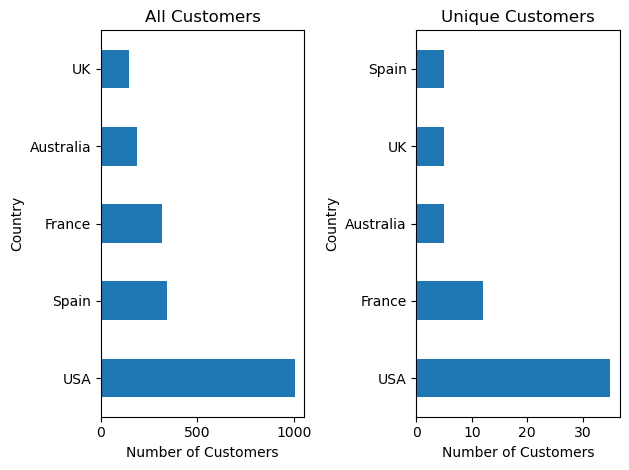

In [82]:
# 1.Identify where customers are coming from.
unique_customer = df.drop_duplicates(subset=['CONTACTLASTNAME','CONTACTFIRSTNAME'], keep='first')
c1 = df['COUNTRY'].value_counts()
c2 = unique_customer['COUNTRY'].value_counts()
print(c1.head())
print(c2.head())

plt.subplot(1, 2, 1)  
c1.head().plot.barh()
plt.xlabel('Number of Customers')
plt.ylabel('Country')
plt.title('All Customers')

plt.subplot(1, 2, 2)  
c2.head().plot.barh()
plt.xlabel('Number of Customers')
plt.ylabel('Country')
plt.title('Unique Customers')

plt.tight_layout()

# c1.head().plot.barh()
# c2.head().plot.barh()
# plt.xlabel('Number of Customers')
# plt.ylabel('Country')
# plt.title('Where customers come from')
# plt.show()

YEAR_ID  MONTH_ID
2003     1            129753.60
         2            140836.19
         3            174504.90
         4            201609.55
         5            192673.11
         6            168082.56
         7            187731.88
         8            197809.30
         9            263973.36
         10           568290.97
         11          1029837.66
         12           261876.46
2004     1            316577.42
         2            311419.53
         3            205733.73
         4            206148.12
         5            273438.39
         6            286674.22
         7            327144.09
         8            461501.27
         9            320750.91
         10           552924.25
         11          1089048.01
         12           372802.66
2005     1            339543.42
         2            358186.18
         3            374262.76
         4            261633.29
         5            457861.06
Name: SALES, dtype: float64
YEAR_ID
2003    3516979.54

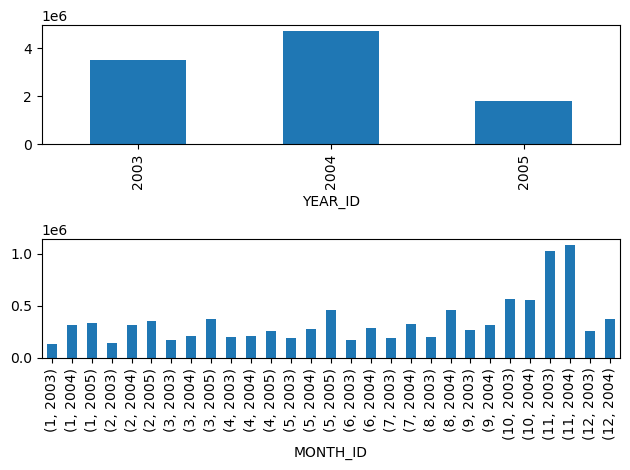

In [117]:
# 2 Find out their yearly retail performance (in terms of total revenue).
revenueByMonth = df.groupby(['YEAR_ID', 'MONTH_ID'])['SALES'].sum()
revenueByYear = df.groupby('YEAR_ID')['SALES'].sum()
revenueByMonth2 = df.groupby(['MONTH_ID','YEAR_ID'])['SALES'].sum()
print(revenueByMonth)
print(revenueByYear)

plt.subplot(2, 1, 1)  
revenueByYear.plot.bar()
plt.xlabel('YEAR_ID')

plt.subplot(2, 1, 2)  
revenueByMonth2.plot.bar()
plt.xlabel('MONTH_ID')
plt.tight_layout()

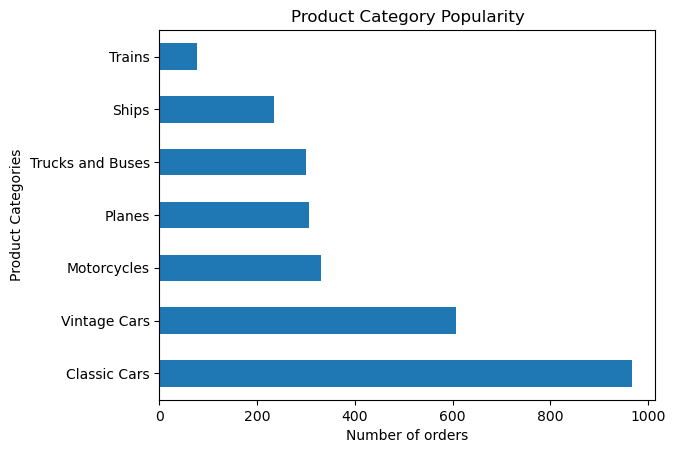

Most popular product categories
Classic Cars    967
Name: PRODUCTLINE, dtype: int64
Least popular product categories
Trains    77
Name: PRODUCTLINE, dtype: int64


In [126]:
# 3 What product categories are the most and least popular?
product = df['PRODUCTLINE'].value_counts()
plt.subplot(1, 1, 1)  
product.plot.barh()
plt.xlabel('Number of orders')
plt.ylabel('Product Categories')
plt.title('Product Category Popularity')
plt.show()
most = df['PRODUCTLINE'].value_counts().head(1)
least = df['PRODUCTLINE'].value_counts().tail(1)
print('Most popular product categories')
print(most)
print('Least popular product categories')
print(least)

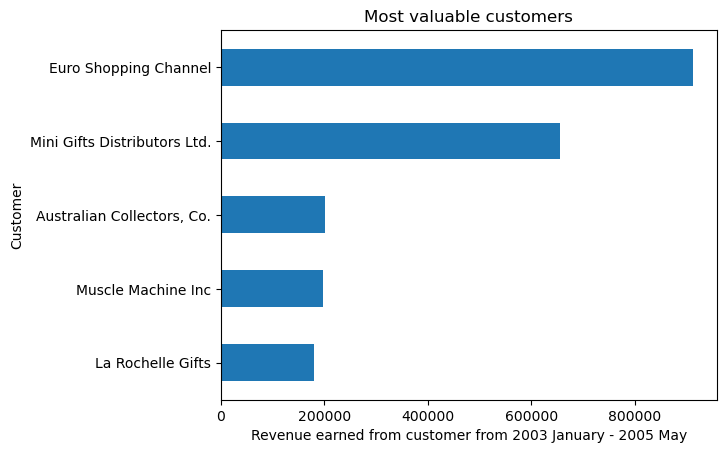

In [143]:
# 4 Who are their most valuable customers (basically we define this as those who purchased the most from them) ?
valuable = df.groupby('CUSTOMERNAME')['SALES'].sum().sort_values().tail(5)
# valuable
plt.subplot(1, 1, 1)  
valuable.plot.barh()
plt.xlabel('Revenue earned from customer from 2003 January - 2005 May')
plt.ylabel('Customer')
plt.title('Most valuable customers')
plt.show()